In [3]:
import pandas as pd

df = pd.read_csv("BEV336OD3361.csv")
aggregated_data = df.groupby(['StichtagDatJahr', 'NationLang']).agg({'AnzBestWir': 'sum'}).reset_index()

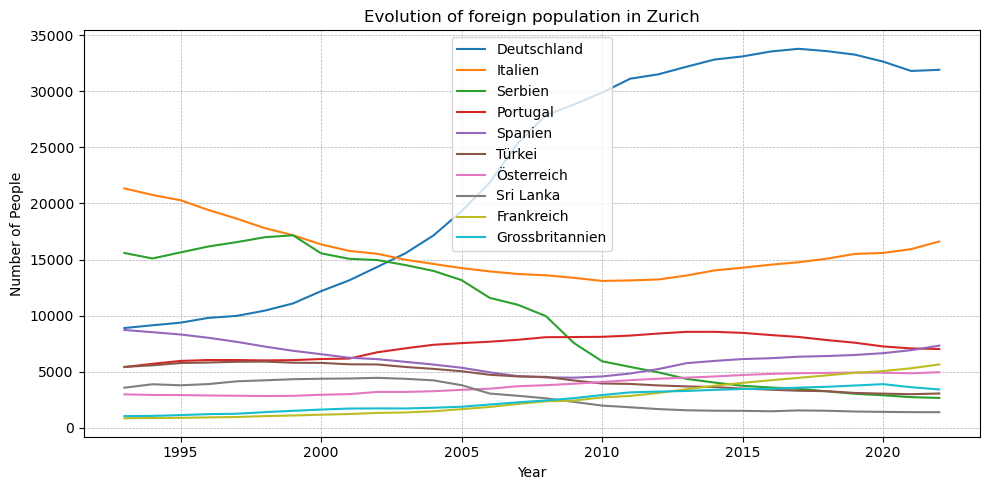

In [9]:
import matplotlib.pyplot as plt

# Calculate average population for each country over the years
avg_population = aggregated_data.groupby('NationLang').agg({'AnzBestWir': 'mean'}).sort_values(by='AnzBestWir', ascending=False)

# Exclude Swiss population from the average population data
avg_population_without_swiss = avg_population.drop('Schweiz', errors='ignore')

# Get the next top 10 countries by average population after excluding Swiss population
next_top_countries = avg_population_without_swiss.head(10).index.tolist()

# Filter the aggregated data to only include these next top 10 countries
filtered_data_without_swiss = aggregated_data[aggregated_data['NationLang'].isin(next_top_countries)]

# Plotting
plt.figure(figsize=(10, 5))

for country in next_top_countries:
    country_data = filtered_data_without_swiss[filtered_data_without_swiss['NationLang'] == country]
    plt.plot(country_data['StichtagDatJahr'], country_data['AnzBestWir'], label=country)

plt.title('Evolution of foreign population in Zurich')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

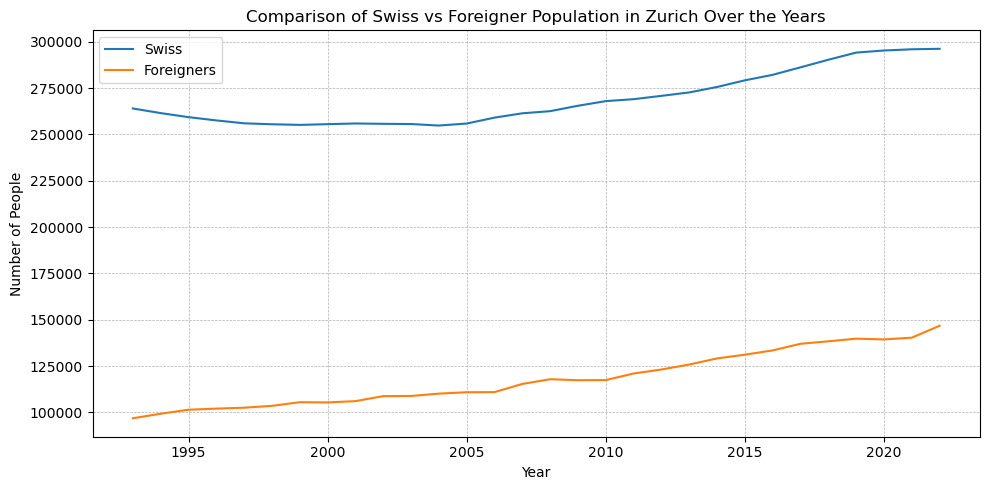

In [7]:
# Create a new column to categorize data into 'Swiss' and 'Foreigners'
df['PopulationType'] = df['NationLang'].apply(lambda x: 'Swiss' if x == 'Schweiz' else 'Foreigners')

# Aggregate data by year and PopulationType
aggregated_population_type = df.groupby(['StichtagDatJahr', 'PopulationType']).agg({'AnzBestWir': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(10, 5))

for pop_type in ['Swiss', 'Foreigners']:
    pop_type_data = aggregated_population_type[aggregated_population_type['PopulationType'] == pop_type]
    plt.plot(pop_type_data['StichtagDatJahr'], pop_type_data['AnzBestWir'], label=pop_type)

plt.title('Comparison of Swiss vs Foreigner Population in Zurich Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

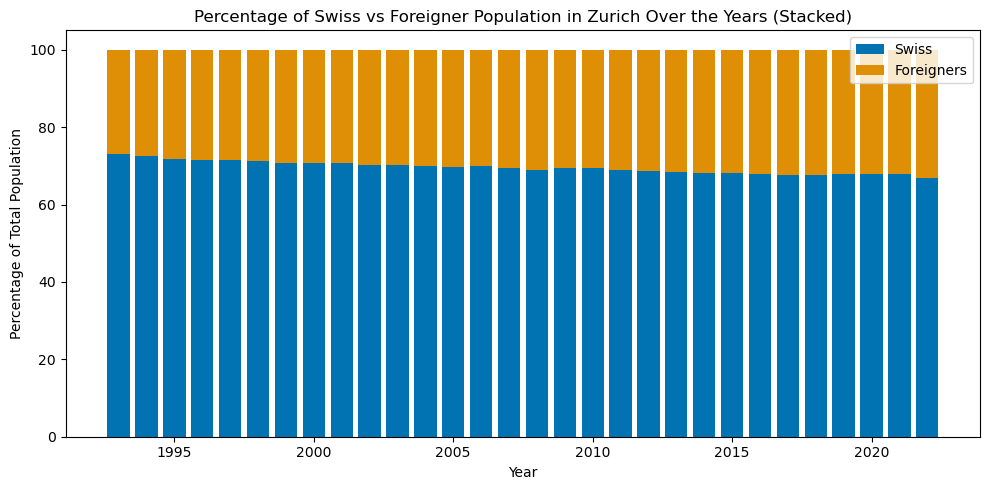

In [6]:
# Using a more distinguishable color palette from seaborn
import seaborn as sns

# Calculate the total population for each year
total_population_per_year = aggregated_population_type.groupby('StichtagDatJahr').agg({'AnzBestWir': 'sum'})

# Merge the total population with the aggregated_population_type DataFrame
merged_data = pd.merge(aggregated_population_type, total_population_per_year, on='StichtagDatJahr', suffixes=('', '_Total'))

# Calculate the percentage for each population type
merged_data['Percentage'] = (merged_data['AnzBestWir'] / merged_data['AnzBestWir_Total']) * 100

# Filter out data for Swiss and Foreigners for plotting
swiss_data = merged_data[merged_data['PopulationType'] == 'Swiss']
foreigners_data = merged_data[merged_data['PopulationType'] == 'Foreigners']

# Using a color-blind friendly color palette
colors_cb = sns.color_palette("colorblind", 2)  # Colorblind-friendly palette for 2 categories

# Plotting
plt.figure(figsize=(10, 5))

# Stacked bar chart
plt.bar(swiss_data['StichtagDatJahr'], swiss_data['Percentage'], color=colors_cb[0], label='Swiss')
plt.bar(foreigners_data['StichtagDatJahr'], foreigners_data['Percentage'], bottom=swiss_data['Percentage'], color=colors_cb[1], label='Foreigners')

plt.title('Percentage of Swiss vs Foreigner Population in Zurich Over the Years (Stacked)')
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.legend()
plt.tight_layout()
plt.show()


